In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
from PIL import Image
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

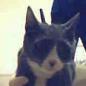

In [5]:
with Image.open('CATS_DOGS/test/CAT/10107.jpg') as im:
    display(im)

In [8]:
path = 'CATS_DOGS/'
img_names = []

for folder,subfolders,filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)

In [9]:
len(img_names)

24994

In [13]:
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)

In [14]:
len(img_sizes)

24994

In [15]:
len(rejected)

0

In [16]:
df = pd.DataFrame(img_sizes)

In [17]:
df.head()

,0,1
0,431,360
1,500,375
2,500,471
3,500,375
4,320,240


In [18]:
df[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [21]:
df[1].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

In [22]:
dog = Image.open('CATS_DOGS/train/DOG/14.jpg')

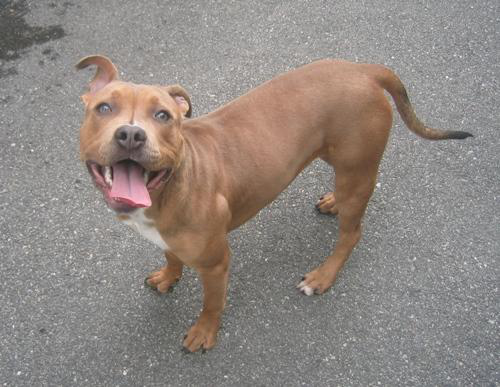

In [23]:
display(dog)

In [24]:
dog.size

(500, 387)

In [25]:
dog.getpixel((0,0))

(90, 95, 98)

In [26]:
transform = transforms.Compose([transforms.ToTensor()])
#transform includes compose to list more than 1 transform object besides .ToTensor
im = transform(dog)
print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


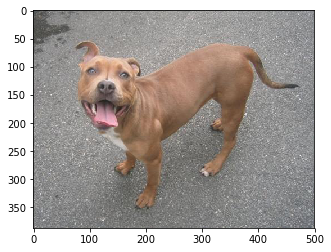

In [31]:
#to plot image format should be (387,500,3)
#(1,2,0) transform

plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [34]:
im

tensor([[[0.3529, 0.3451, 0.3373,  ..., 0.5686, 0.5333, 0.5216],
         [0.3255, 0.3412, 0.3333,  ..., 0.5765, 0.5451, 0.5294],
         [0.2863, 0.3216, 0.3373,  ..., 0.5529, 0.5255, 0.4980],
         ...,
         [0.5765, 0.5451, 0.4824,  ..., 0.5686, 0.5059, 0.5216],
         [0.6157, 0.5922, 0.4941,  ..., 0.5294, 0.5176, 0.5176],
         [0.5922, 0.5843, 0.5020,  ..., 0.5882, 0.6314, 0.6039]],

        [[0.3725, 0.3647, 0.3569,  ..., 0.5725, 0.5373, 0.5255],
         [0.3451, 0.3608, 0.3529,  ..., 0.5804, 0.5490, 0.5333],
         [0.3059, 0.3412, 0.3569,  ..., 0.5569, 0.5294, 0.5020],
         ...,
         [0.5608, 0.5294, 0.4745,  ..., 0.5765, 0.5137, 0.5294],
         [0.6000, 0.5765, 0.4863,  ..., 0.5373, 0.5255, 0.5255],
         [0.5765, 0.5686, 0.4941,  ..., 0.5961, 0.6392, 0.6118]],

        [[0.3843, 0.3765, 0.3686,  ..., 0.5882, 0.5529, 0.5412],
         [0.3569, 0.3725, 0.3647,  ..., 0.5961, 0.5647, 0.5490],
         [0.3176, 0.3529, 0.3686,  ..., 0.5725, 0.5451, 0.

In [35]:
#pytorch automaticly normalize values like below
im[:,0,0]

tensor([0.3529, 0.3725, 0.3843])

In [36]:
np.array((90,95,98))/255

array([0.35294118, 0.37254902, 0.38431373])

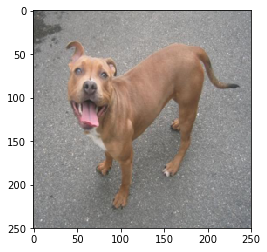

In [44]:
transform = transforms.Compose([
    transforms.Resize((250,250)),
    transforms.CenterCrop(250),
    transforms.ToTensor()
    ])
#transform includes compose to list more than 1 transform object besides .ToTensor
im = transform(dog)


plt.imshow(np.transpose(im.numpy(),(1,2,0)))

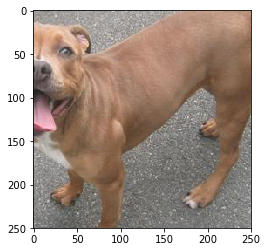

In [41]:
transform = transforms.Compose([
    transforms.CenterCrop(250),
    transforms.ToTensor()
    ])
#transform includes compose to list more than 1 transform object besides .ToTensor
im = transform(dog)


plt.imshow(np.transpose(im.numpy(),(1,2,0)))

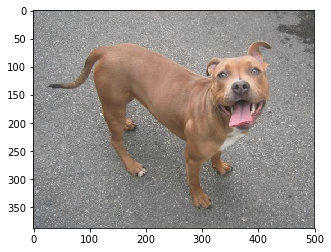

In [47]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1), #p is probability, 
    transforms.ToTensor()
    ])
#transform includes compose to list more than 1 transform object besides .ToTensor
im = transform(dog)


plt.imshow(np.transpose(im.numpy(),(1,2,0)))

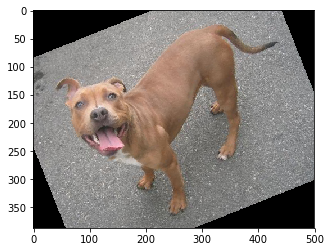

In [65]:
transform = transforms.Compose([
    transforms.RandomRotation(30), #p in range 30 degg rand rotation
    transforms.ToTensor()
    ])
#transform includes compose to list more than 1 transform object besides .ToTensor
im = transform(dog)


plt.imshow(np.transpose(im.numpy(),(1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


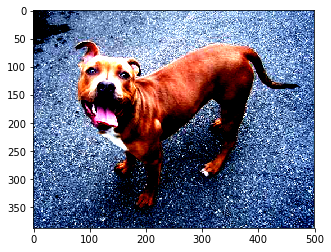

In [67]:
transfrom = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    #there is a research that given mean and std values best in practice
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

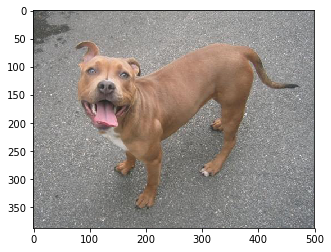

In [70]:
#Inverse normalization process to see image in original form
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));